## In this notebook, we will be creating random networks using the Erdos-Renyi model and studying various properties of the network


In [2]:
## Installing the required packages

install.packages("igraph")
install.packages("pracma")
library('igraph')
library('Matrix')
library('pracma')
install.packages("remotes")
remotes::install_github("galanisl/NetHypGeom")
install.packages('matrixStats')
library(matrixStats)



The downloaded binary packages are in
	/var/folders/c7/3fwnkxl54f79gq5l949_hmjh0000gn/T//Rtmptn07Eq/downloaded_packages

The downloaded binary packages are in
	/var/folders/c7/3fwnkxl54f79gq5l949_hmjh0000gn/T//Rtmptn07Eq/downloaded_packages



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘pracma’


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu





The downloaded binary packages are in
	/var/folders/c7/3fwnkxl54f79gq5l949_hmjh0000gn/T//Rtmptn07Eq/downloaded_packages


Skipping install of 'NetHypGeom' from a github remote, the SHA1 (3ed27087) has not changed since last install.
  Use `force = TRUE` to force installation




The downloaded binary packages are in
	/var/folders/c7/3fwnkxl54f79gq5l949_hmjh0000gn/T//Rtmptn07Eq/downloaded_packages


## Generating a random network using the Erdos-Renyi model and plotting it's degree distribution

In [2]:
# Generating the Erdos-Renyi network
num_nodes = 500
edge_prob = 0.003
erdos_graph = sample_gnp(num_nodes, edge_prob, directed = FALSE)

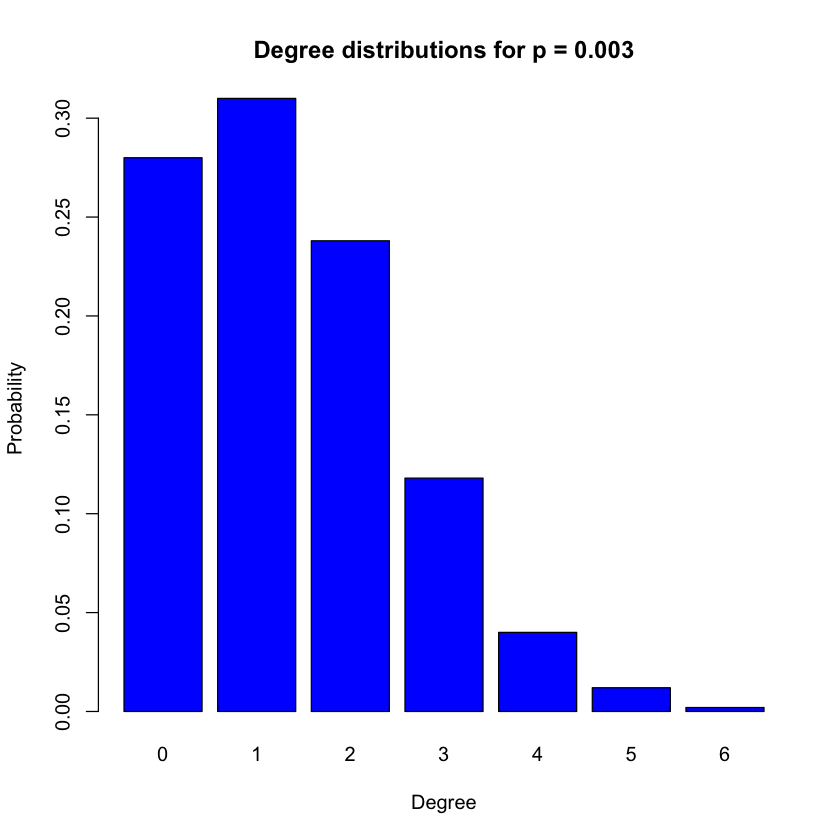

In [3]:
# Plotting the node degree distribution of the Erdos-Renyi network as a bar plot
node_deg_dist = degree.distribution(erdos_graph)
xVals = c(0: (length(node_deg_dist) - 1))
barplot(node_deg_dist, names.arg=xVals, xlab="Degree", ylab="Probability",
        main = paste("Degree distributions for p =", edge_prob, sep = " "),col="blue")

In [4]:
## In Discussion 1 practice problem 1, we derived that the degree distribution follows a binomial distribution.
## For a binomial distribution, the mean is given by np and the variance is given by np(1-p)

analytical_mean = num_nodes * edge_prob
analytical_variance = num_nodes * edge_prob * (1-edge_prob)
simulated_mean = mean(degree(erdos_graph))
simulated_variance = var(degree(erdos_graph))
print(paste("Analytical mean of the degree distribution is",":", analytical_mean))
print(paste("Simulated mean of the degree distribution is",":", simulated_mean))
print(paste("Analytical variance of the  degree distribution is",":", analytical_variance))
print(paste("Simulated variance of the  degree distribution is",":", simulated_variance))

[1] "Analytical mean of the degree distribution is : 1.5"
[1] "Simulated mean of the degree distribution is : 1.372"
[1] "Analytical variance of the  degree distribution is : 1.4955"
[1] "Simulated variance of the  degree distribution is : 1.45652905811623"


## Analyzing the connectivity properties of the Erdos-Renyi network

In [5]:
# Checking the connectivity of the generated Erdos-Renyi network
connectivity = is_connected(erdos_graph)
print(connectivity)

[1] FALSE


In [6]:
## In Discussion 1 practice problem 2, we derived that Erdos-Renyi network is surely disconnected for p < ln(n)/n and
## is almost surely connected for p > ln(n)/n. In this cell, we generate 1000 realization of Erdos-Renyi network
## with 500 nodes and p = 0.003 and show that for all the realization the network is disconnected.

connectedCount_dis = 0
for(i in c(1:1000)) {
        temp_g = sample_gnp(500, 0.003, directed = FALSE)
        if(is_connected(temp_g)) {
            connectedCount_dis = connectedCount_dis + 1
        }
    }
connectivity_prob_dis = connectedCount_dis/1000
print(paste("Estimated connectivity probability for p =",0.003,":", connectivity_prob_dis))
gccDiameter = diameter(temp_g)
print(paste("diammeter is: ", gccDiameter))

## Now the threshold for connectvity for an Erdos-Renyi network with 500 nodes is ln(500)/500 ~ 0.012. We
## generate 1000 realization of Erdos-Renyi network
## with 500 nodes and p = 0.02 and show that P(network is connected) ~ 1

connectedCount_con = 0
for(j in c(1:1000)) {
        temp_g = sample_gnp(500, 0.02, directed = FALSE)
        if(is_connected(temp_g)) {
            connectedCount_con = connectedCount_con + 1
        }
    }
connectivity_prob_con = connectedCount_con/1000
print(paste("Estimated connxectivity probability for p =",0.02,":", connectivity_prob_con))



[1] "Estimated connectivity probability for p = 0.003 : 0"
[1] "diammeter is:  25"
[1] "Estimated connectivity probability for p = 0.02 : 0.98"


## Analyzing the Giant Connected Component (GCC) of an Erdos-Renyi network: A network is a set of nodes and a set of edges between nodes, this means that it is possible to have a network that is made up of several islands of nodes, where no connections exist between nodes on different islands. In Network theory these islands are called Components. For example in a social network we might see two separate groups of friends where there are no friendships between the groups, in this case we have two components. In many networks as the network grows the components get gradually connected together. At some point we can say that a significant proportion of the nodes are connected together in one Giant Component. In the Erdos-Renyi model, if p < 1/n then with high probability all the components have size order of log(n) and if p > 1/n then with high probability there is a single giant connected component (GCC) and all other components having a size order of log(n)

[1] "Analytical threshold at which GCC appears : 0.001"
[1] "Analytical threshold at which graph becomes connected : 0.00690775527898214"


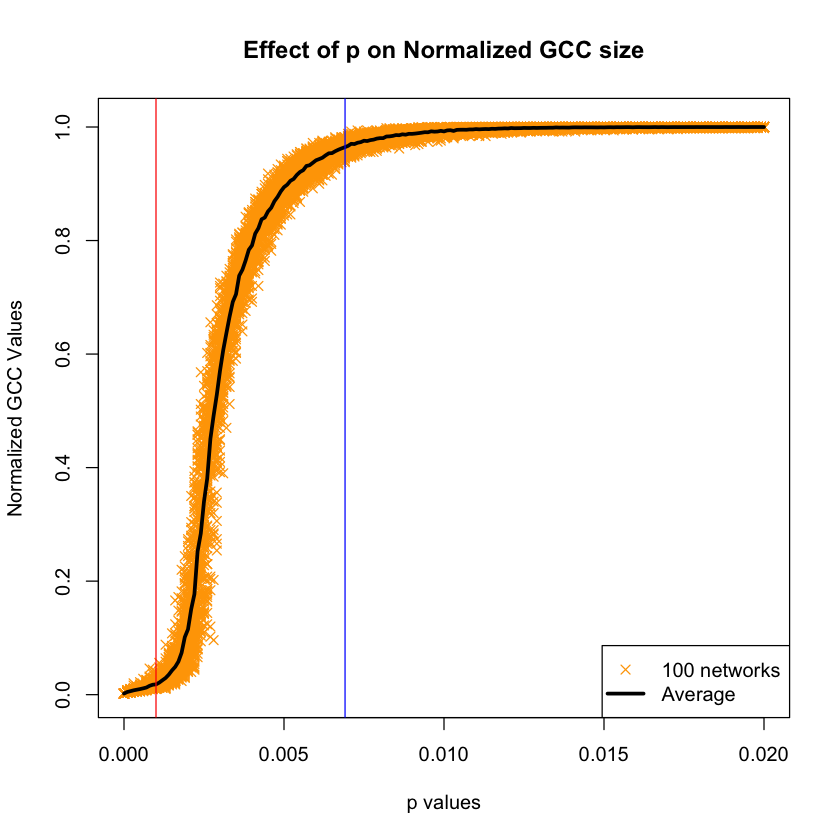

In [8]:
## We sweep p from 0 to 0.02 in increments of 0.0001 and for each value of p we generate 100 instances of the network
## using the Erdos-Renyi model. We compute the normalized GCC size (GCC size/500) for each instance and plot them as
## a scatter plot. We also plot the average value of normalized GCC (averaged over 100 instances) against p.


p_sweep = seq(0, 0.02, 0.0001)
avgVals = rep(0, length(p_sweep))
analytical_GCC_th = 1/1000
analytical_connectivity_th = log(1000)/1000

j = 1
plot(1, type = "n", xlab = "p values",
     ylab = "Normalized GCC Values", xlim = c(0, 0.02),
     main = "Effect of p on Normalized GCC size",
     ylim = c(0, 1.01))


for (p in p_sweep) {
    total = 0
    for (i in c(1:100)) {
        g = sample_gnp(num_nodes, p, directed = FALSE)
        comps = clusters(g)
        sz = max(comps$csize)
        normalizedGCC = sz / num_nodes
        total = total + normalizedGCC
        points(p, normalizedGCC, col= 'orange', pch=4)
    }
    avgVals[j] = total / 100
    j = j + 1
}

lines(p_sweep, avgVals, lwd=3.0)
abline(v=analytical_GCC_th, col="red")
abline(v=analytical_connectivity_th, col="blue")

legend(x = "bottomright",
       legend = c("100 networks", "Average"),  
       pch = c(4, NA),           
       lty = c(NA, 1),           
       lwd = c(NA, 3.0),
       col = c("orange", 1)
      )


print(paste("Analytical threshold at which GCC appears",":", analytical_GCC_th))
print(paste("Analytical threshold at which graph becomes connected",":", analytical_connectivity_th))

## Analyzing the relationship between the average GCC size and the number of nodes in the network when the average node degree is kept fixed

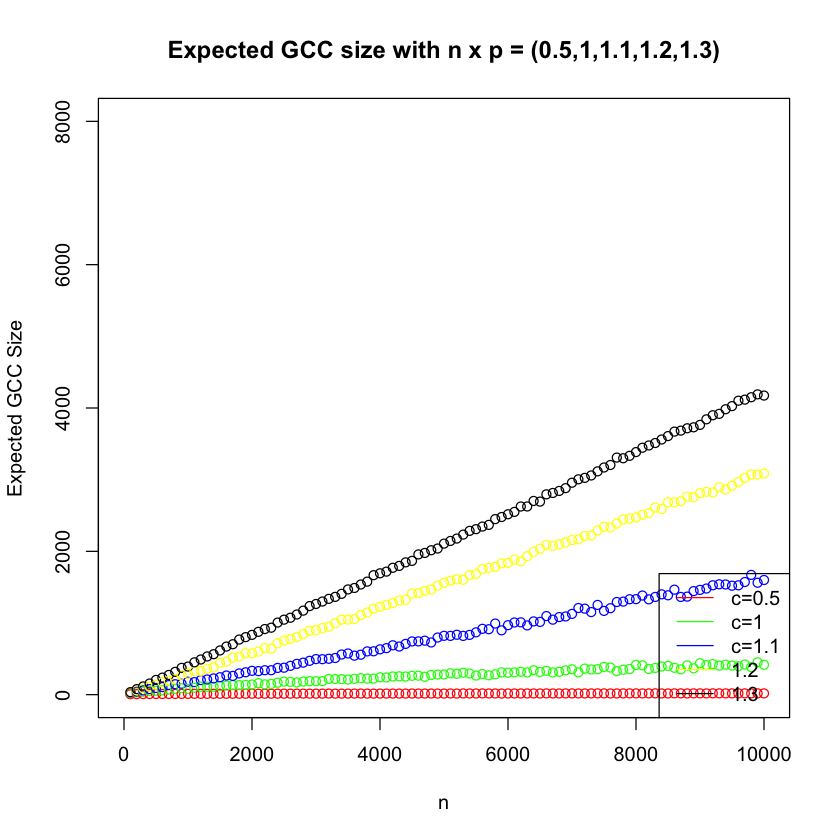

In [10]:
## In order to understand the relationship between the average GCC size and the number of nodes when the average node 
## degree is kept fixed, we perform the following experiment: (i) For a given average node degree,
## we sweep the network size from 100 to 10000 and for each network size we compute the average GCC size by averaging
## over 100 instances of the random network (ii) We repeat (i) for different average node degree (iii) We plot
## average GCC size as a function of network size

n_sweep = seq(100, 10000, 100)

c_sweep = c(0.5,1,1.1,1.2,1.3)
colors = c("red", "green", "blue","yellow","black")

plot(1, type = "n", xlab = "n",
     ylab = "Expected GCC Size", xlim = c(0, 10000), ylim = c(0, 8000),
     main = "Expected GCC size with n x p = (0.5,1,1.1,1.2,1.3)")

for (i in n_sweep) {
    for (k in (1 : length(c_sweep))) {
        p = c_sweep[k] / i
        #Expected value calculation
        total = 0
        for (j in c(1:100)) {
            g = sample_gnp(i, p, directed = FALSE)
            comps = clusters(g)
            sz = max(comps$csize)
            total = total + sz
        }
        expected_val = total / 100
        points(i, expected_val, col= colors[k])
    }
}

legend(x = "bottomright",
       legend = c("c=0.5", "c=1", "c=1.1", c="1.2",c="1.3"),             
       lty = c(1, 1, 1),           
       col = c("red", "green", "blue","yellow","black")
      )

# Question 2 


In [3]:
# 2a
num_nodes = 1000
m = 1
undirectedGraph = sample_pa(num_nodes, m, directed = FALSE)node = sample(gorder(g),1)

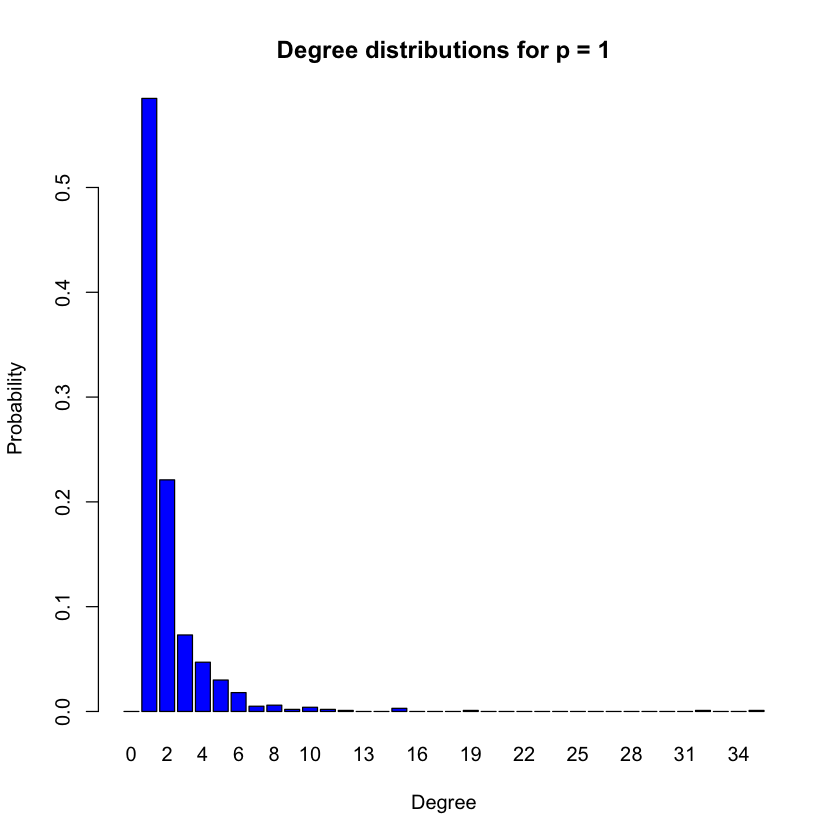

In [4]:
# Plotting the node degree distribution of the undirected network as a bar plot
node_deg_dist = degree.distribution(undirectedGraph)
xVals = c(0: (length(node_deg_dist) - 1))
barplot(node_deg_dist, names.arg=xVals, xlab="Degree", ylab="Probability",
        main = paste("Degree distributions for p =", m, sep = " "),col="blue")

The network is always connected

In [5]:
clustered = cluster_fast_greedy(undirectedGraph, modularity = TRUE) # 2b
moduled = modularity(clustered)
print(moduled)

[1] 0.9286925


In [6]:
largerG = sample_pa(10000, m, directed = FALSE) #2c
moduled2 = modularity(cluster_fast_greedy(largerG, modularity = TRUE))
print(moduled2)

[1] 0.9785713


2d Plot the degree distribution in a log-log scale for both n = 1000, 10000, then estimate the slope of the plot using linear regression.

In [23]:
deg1 = node_deg_dist = log(degree.distribution(undirectedGraph))
logXvals = log(xVals)

In [27]:
lm((deg1) ~ (logXvals))

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): NA/NaN/Inf in 'x'


In the two networks generated in 2(a) and 2(c), perform the following:
Randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. Is the distribution linear in the log-log scale? If so, what is the slope? How does this differ from the node degree distribution?
Hint Useful function(s): sample

In [29]:
# Plotting the node degree distribution of the undirected network as a bar plot
node = sample(undirectedGraph,1)
node = sample(neighbors(undirectedGraph, node),1)
node_deg_dist = log(degree.distribution(node))
xVals = c(0: (length(node_deg_dist) - 1))

barplot(node_deg_dist, names.arg=xVals, xlab="Degree", ylab="Probability",
        main = paste("Degree distributions for p =", m, sep = " "),col="blue")

ERROR: Error in neighbors(undirectedGraph, node): At core/graph/type_indexededgelist.c:770 : Given vertex is not in the graph. Invalid vertex id


3a. Each time a new vertex is added, it creates m links to old vertices and the probability that an old vertex is cited depends on its degree (preferential attachment) and age. In particular, the probability that a newly added vertex connects to an old vertex is proportional to:
P [i] ∼ (ckiα + a)(dliβ + b),
where ki is the degree of vertex i in the current time step, and li is the age of vertex i. Produce such an undirected network with 1000 nodes and parameters m = 1, α=1,β=−1,anda=c=d=1,b=0. Plotthedegreedistribution. Whatisthe power law exponent?

In [30]:
age_graph = sample_pa_age(1000, m=1, pa.exp=1, aging.exp=-1, zero.deg.appeal=1, deg.coef=1, age.coef=1, zero.age.appeal=0, directed=FALSE)

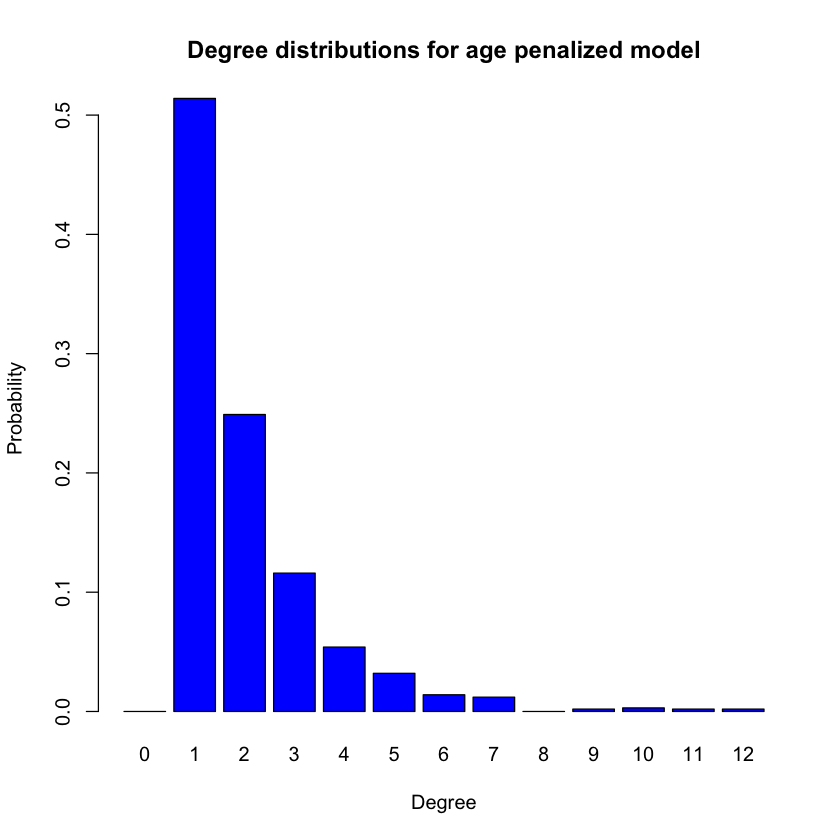

In [33]:
node_deg_dist = degree.distribution(age_graph)
xVals = c(0: (length(node_deg_dist) - 1))
barplot(node_deg_dist, names.arg=xVals, xlab="Degree", ylab="Probability",
        main = paste("Degree distributions for age penalized model"),col="blue")

(b) Use fast greedy method to find the community structure. What is the modularity?

In [38]:
cluster_fast_greedy(age_graph)
clustered = cluster_fast_greedy(age_graph)

IGRAPH clustering fast greedy, groups: 35, mod: 0.93
+ groups:
  $`1`
   [1]   5   7   9  11  21  55  58  60  65  77  86  94 103 105 106 110 144 146
  [19] 170 208 233 239 359 390 397 400 401 406 430 458 460 474 514 521 553 560
  [37] 608 610 710 765 779 867 889 974
  
  $`2`
   [1]  29  30  33  35  61  64  83  90  93 125 176 220 222 223 257 283 319 323
  [19] 347 349 354 357 386 419 492 519 535 546 569 655 662 681 688 718 745 756
  [37] 771 774 801 813 871 892 983 994 996
  
  + ... omitted several groups/vertices

In [37]:
modularity(clustered)

[1] 0.934459

# Part 2 

# Generating a random network using the Erdos-Renyi model and performing random walk on it

In [3]:
# Generating the Erdos-Renyi network
num_nodes = 1000
edge_prob = 0.01
erdos_graph = sample_gnp(num_nodes, edge_prob, directed = FALSE)

In [4]:
t = 100
ver_sequence = c(1:t)

# Helper function provided for random walk
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}


random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
    
        # fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        ver_sequence[i] = v
        PMF = transition_matrix[v, ]
        # perform random walk
        v = sample(1:vcount(g), 1, prob = PMF)
        if(i == t)
          # dis = distances(g,v= start_node, to=v)
          # dis = shortest.paths(g,)
          degree_ = degree(g,v)
    }
   return(list(distances = ver_sequence,degrees = degree_))
}

In [5]:
# Checking if the graph is connected
connectivity = is_connected(erdos_graph)
print(connectivity)

[1] TRUE


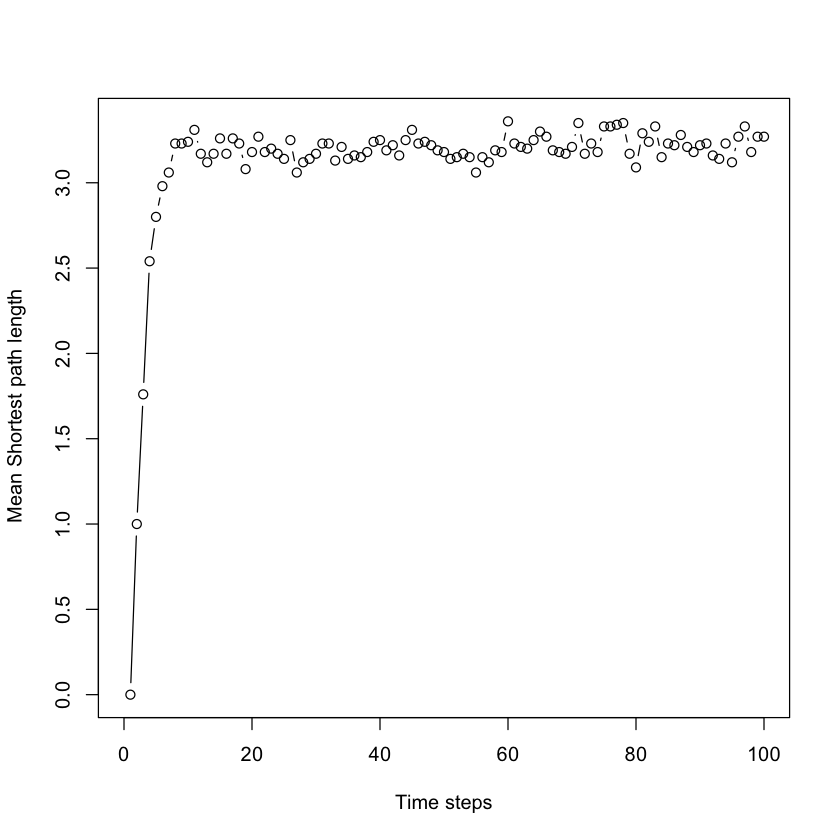

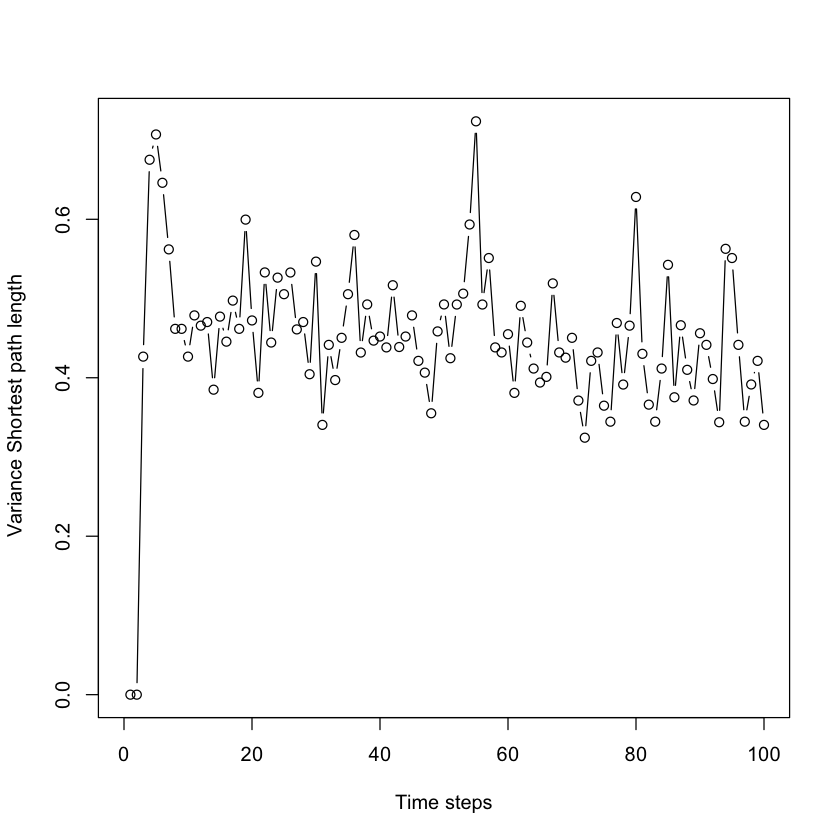

In [6]:
# Performing a 100 step random walk for 100 times on the erdos graph and plotting the mean and
# the variance of the shortest path
degree_list = c(1:100)
iters = 100
distances = matrix(NA, nrow=iters, ncol=t)
start_nodes = sample(1:vcount(erdos_graph),100)
for(i in 1:iters){
    results = random_walk(erdos_graph,t,start_nodes[i])
    vertex_sequences = results[['distances']]
    end_node_degree = results[['degrees']][1]
    distances[i,] = shortest.paths(erdos_graph,vertex_sequences,start_nodes[i])
    degree_list[i] = end_node_degree
}

plot(colMeans(distances),type="b", xlab='Time steps', ylab=' Mean Shortest path length', xlim=c(0,100))
plot(colVars(distances),type="b", xlab='Time steps', ylab=' Variance Shortest path length', xlim=c(0,100))



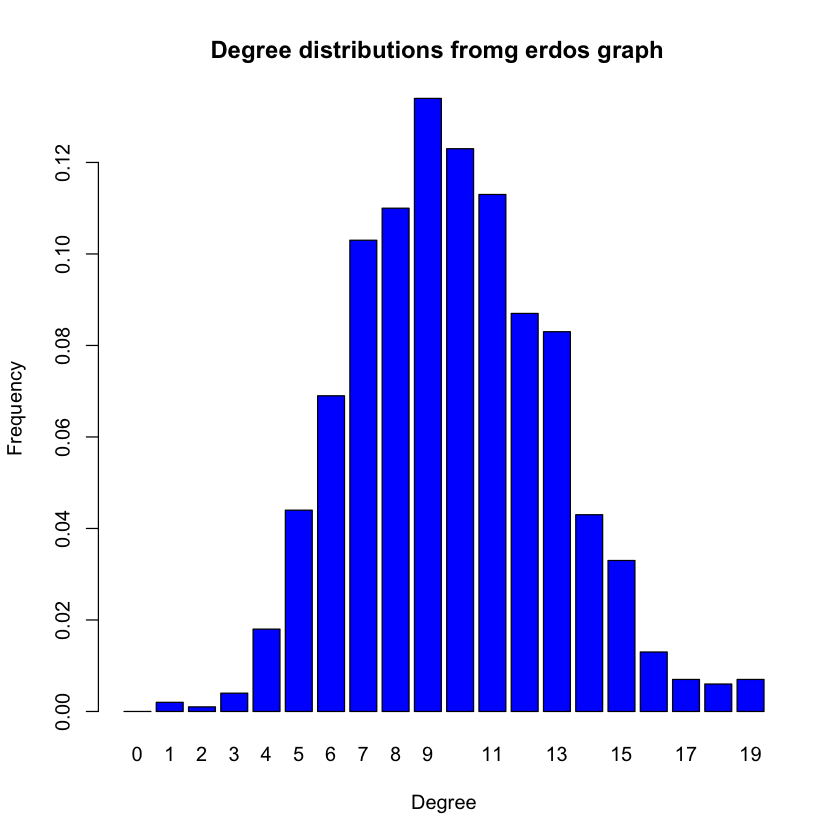

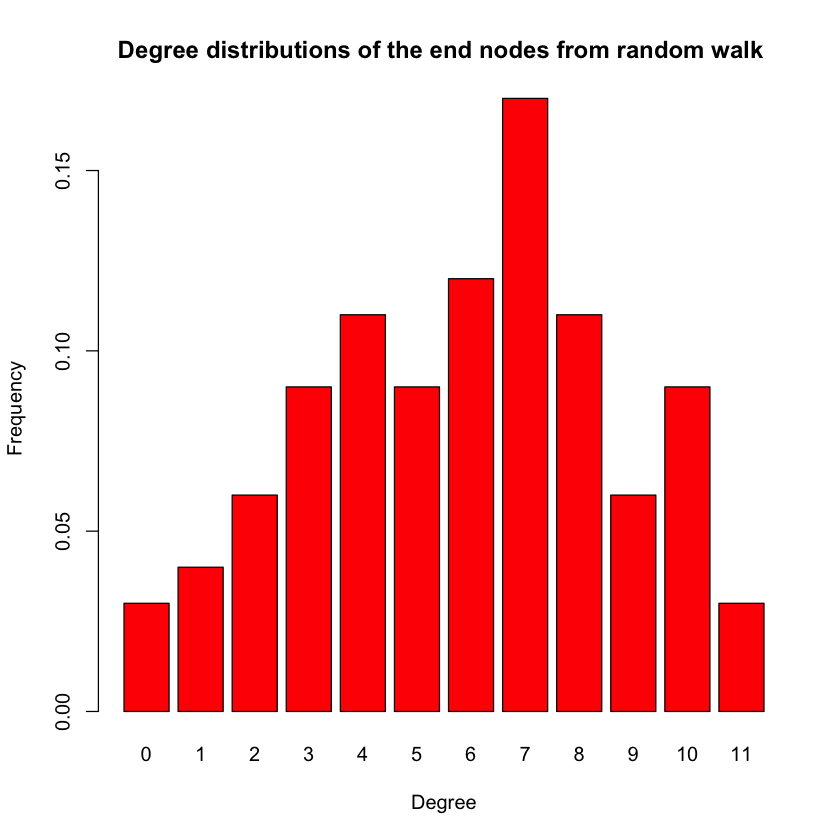

In [7]:
# Plotting the degree distribution of the nodes reached at the end of the random walk along with the 
# degree distribution of the graph

#  degree distribution of graph
d_dist = degree.distribution(erdos_graph)
xVals = c(0: (length(d_dist) - 1))
barplot(d_dist, names.arg=xVals, xlab="Degree", ylab="Frequency",
            main = paste("Degree distributions fromg erdos graph  " ,sep = " "), col="blue")


#  degree distribution from random walk over random nodes
freq = table(degree_list)/length(degree_list)
xVals = c(0: (length(freq) - 1))
barplot(freq, names.arg=xVals, xlab="Degree", ylab="Frequency",
            main = paste("Degree distributions of the end nodes from random walk " ,sep = " "), col="red")

1d) Repeat 1(b) for undirected random networks with 10000 nodes. Compare the results and explain qualitatively. Does the diameter of the network play a role?

In [8]:
# Generating the Erdos-Renyi network
num_nodes = 10000
edge_prob = 0.01
erdos_graph = sample_gnp(num_nodes, edge_prob, directed = FALSE)

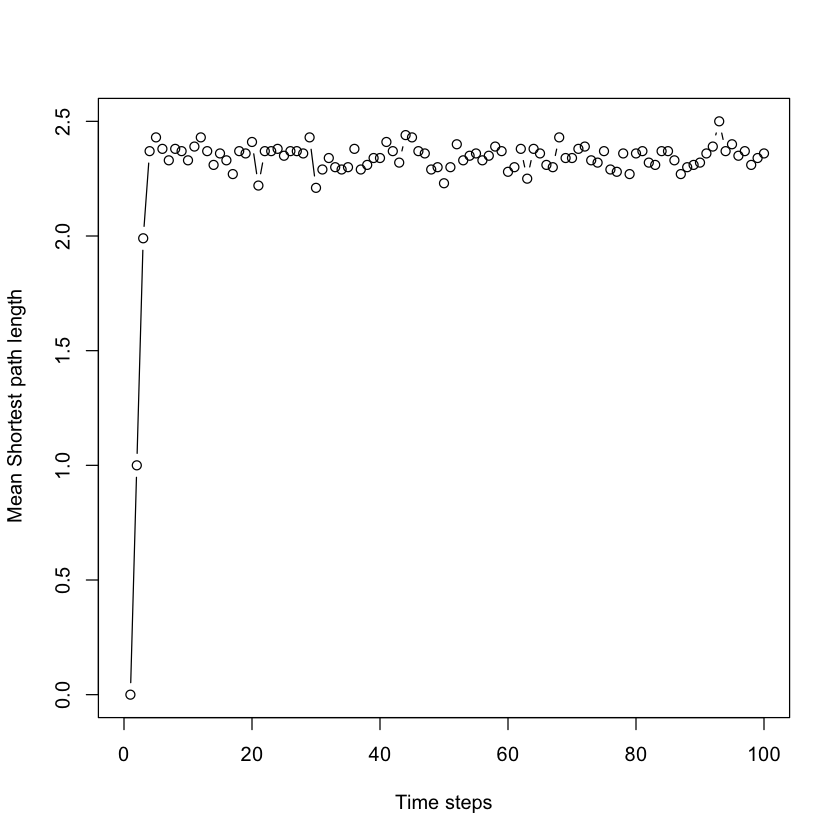

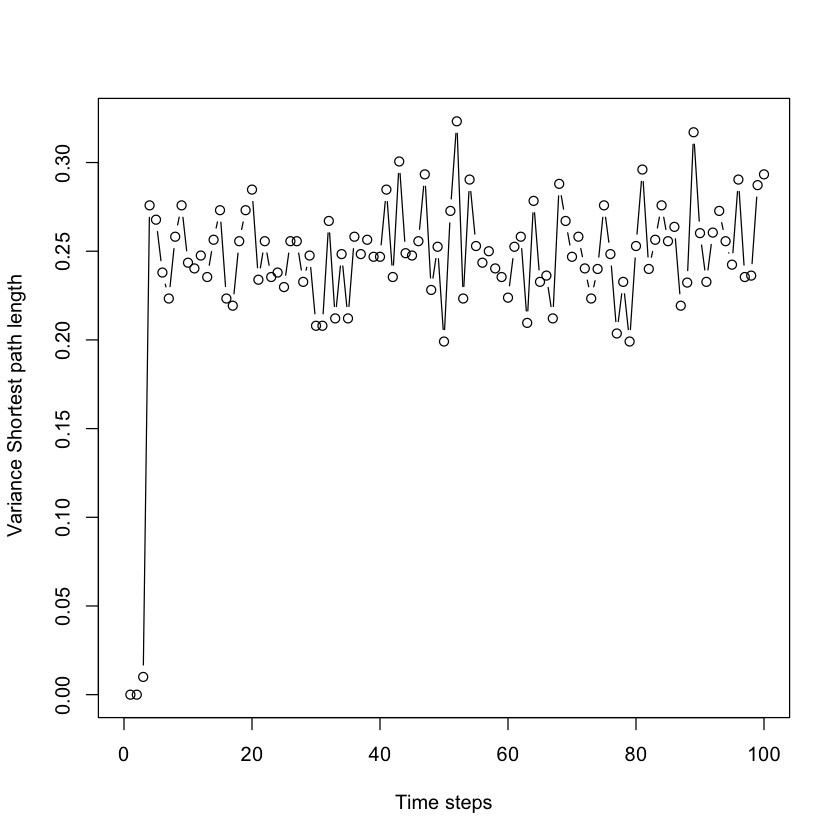

In [9]:
# Performing a 100 step random walk for 100 times on the erdos graph and plotting the mean and
# the variance of the shortest path
degree_list = c(1:100)
iters = 100
distances = matrix(NA, nrow=iters, ncol=t)
start_nodes = sample(1:vcount(erdos_graph),100)
for(i in 1:iters){
    results = random_walk(erdos_graph,t,start_nodes[i])
    vertex_sequences = results[['distances']]
    end_node_degree = results[['degrees']][1]
    distances[i,] = shortest.paths(erdos_graph,vertex_sequences,start_nodes[i])
    degree_list[i] = end_node_degree
}

plot(colMeans(distances),type="b", xlab='Time steps', ylab=' Mean Shortest path length', xlim=c(0,100))
plot(colVars(distances),type="b", xlab='Time steps', ylab=' Variance Shortest path length', xlim=c(0,100))




In [10]:
# Generating the PA network
fat_graph = sample_pa(n = 1000, m = 1, directed = FALSE)

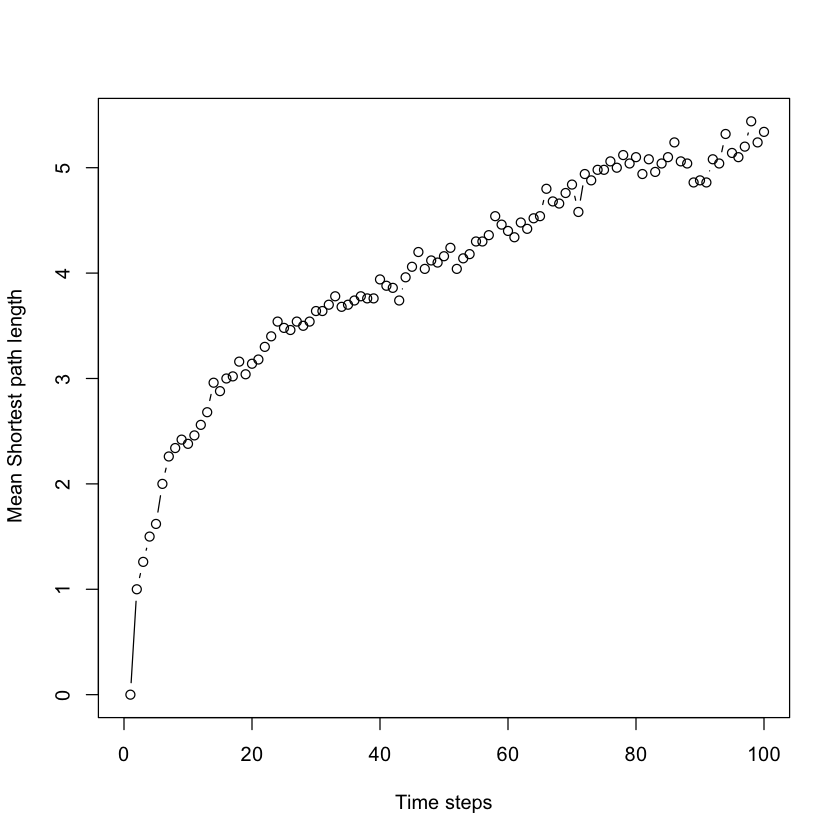

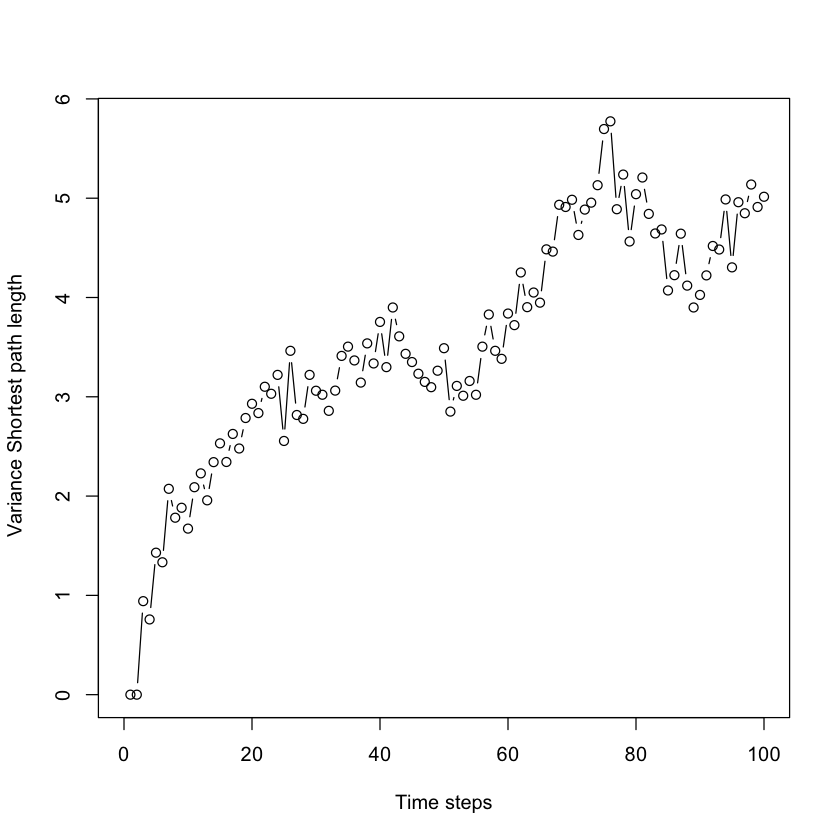

In [11]:
degree_list = c(1:100)
iters =100
distances = matrix(NA, nrow=iters, ncol=t)
start_nodes = sample(1:vcount(fat_graph),100)
for(i in 1:iters){
    results = random_walk(fat_graph,t,start_nodes[i])
    vertex_sequences = results[['distances']]
    end_node_degree = results[['degrees']][1]
    distances[i,] = shortest.paths(fat_graph,vertex_sequences,start_nodes[i])
    degree_list[i] = end_node_degree
}

plot(colMeans(distances),type="b", xlab='Time steps', ylab=' Mean Shortest path length', xlim=c(0,100))
plot(colVars(distances),type="b", xlab='Time steps', ylab=' Variance Shortest path length', xlim=c(0,100))

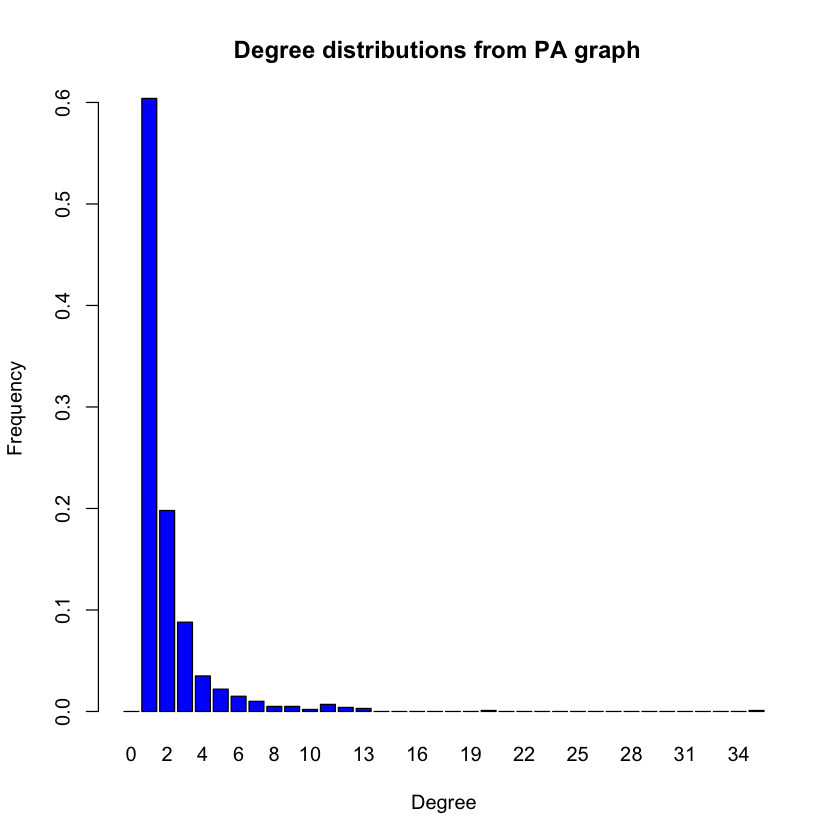

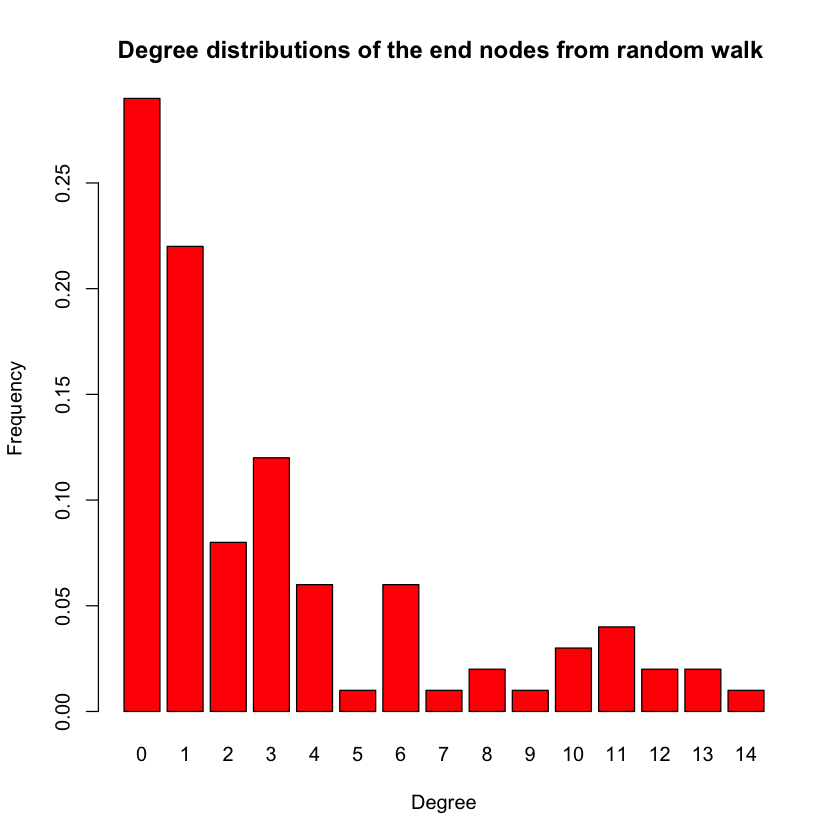

In [12]:
# Plotting the degree distribution of the nodes reached at the end of the random walk along with the 
# degree distribution of the graph

#  degree distribution of graph
d_dist = degree.distribution(fat_graph)
xVals = c(0: (length(d_dist) - 1))
barplot(d_dist, names.arg=xVals, xlab="Degree", ylab="Frequency",
            main = paste("Degree distributions from PA graph  " ,sep = " "), col="blue")


#  degree distribution from random walk over random nodes
freq = table(degree_list)/length(degree_list)
xVals = c(0: (length(freq) - 1))
barplot(freq, names.arg=xVals, xlab="Degree", ylab="Frequency",
            main = paste("Degree distributions of the end nodes from random walk " ,sep = " "), col="red")

2d) Repeat 2(b) for preferential attachment networks with 100 and 10000 nodes, and m = 1. Compare the results and explain qualitatively. Does the diameter of the network play a role?

In [13]:
fat_graph = sample_pa(n = 100, m = 1, directed = FALSE)

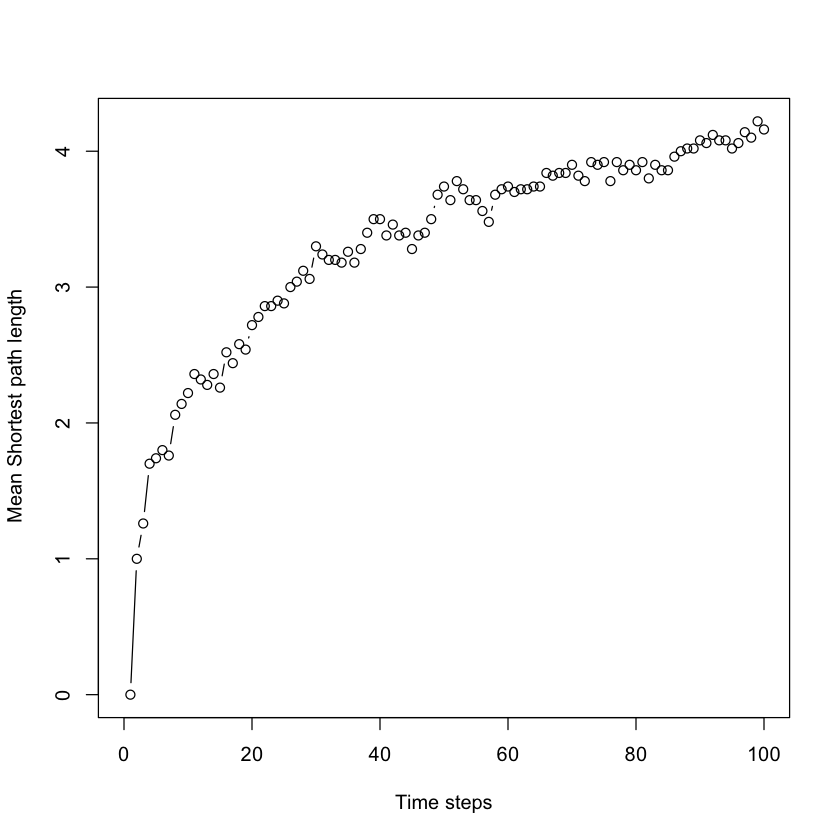

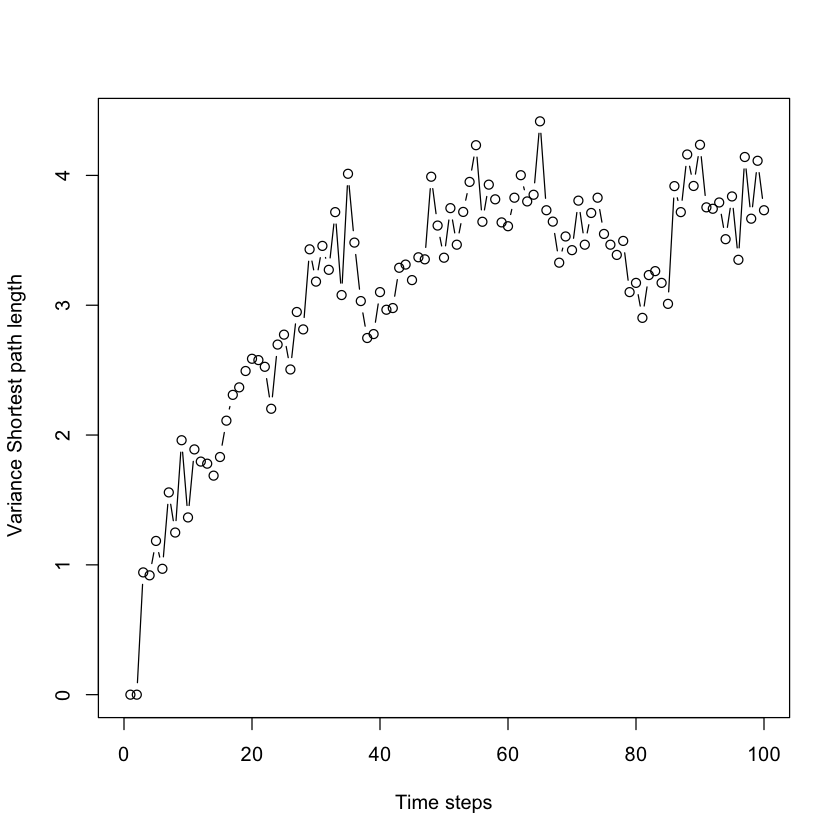

In [14]:
degree_list = c(1:100)
iters =100
distances = matrix(NA, nrow=iters, ncol=t)
start_nodes = sample(1:vcount(fat_graph),100)
for(i in 1:iters){
    results = random_walk(fat_graph,t,start_nodes[i])
    vertex_sequences = results[['distances']]
    end_node_degree = results[['degrees']][1]
    distances[i,] = shortest.paths(fat_graph,vertex_sequences,start_nodes[i])
    degree_list[i] = end_node_degree
}

plot(colMeans(distances),type="b", xlab='Time steps', ylab=' Mean Shortest path length', xlim=c(0,100))
plot(colVars(distances),type="b", xlab='Time steps', ylab=' Variance Shortest path length', xlim=c(0,100))

In [15]:
fat_graph = sample_pa(n = 10000, m = 1, directed = FALSE)

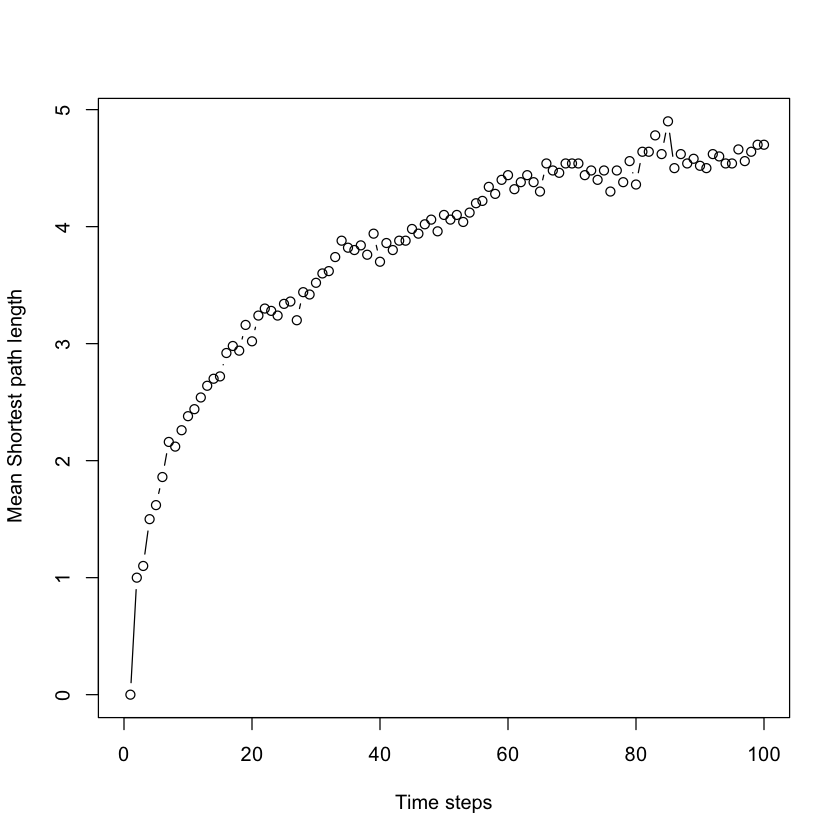

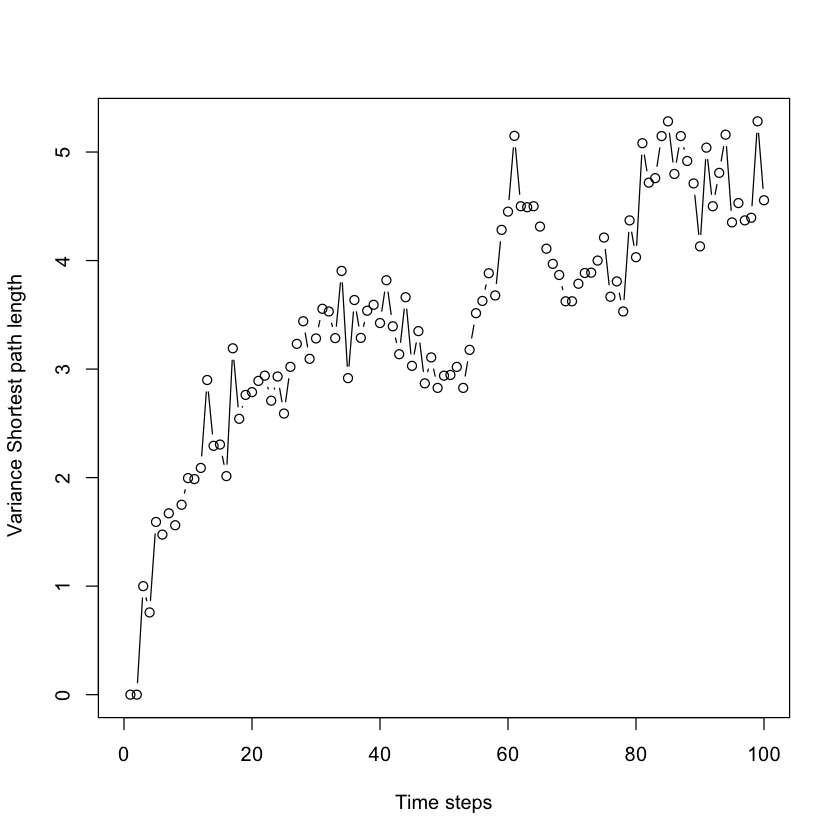

In [16]:
degree_list = c(1:100)
iters =100
distances = matrix(NA, nrow=iters, ncol=t)
start_nodes = sample(1:vcount(fat_graph),100)
for(i in 1:iters){
    results = random_walk(fat_graph,t,start_nodes[i])
    vertex_sequences = results[['distances']]
    end_node_degree = results[['degrees']][1]
    distances[i,] = shortest.paths(fat_graph,vertex_sequences,start_nodes[i])
    degree_list[i] = end_node_degree
}

plot(colMeans(distances),type="b", xlab='Time steps', ylab=' Mean Shortest path length', xlim=c(0,100))
plot(colVars(distances),type="b", xlab='Time steps', ylab=' Variance Shortest path length', xlim=c(0,100))

Helper functions



In [17]:
# Helper functions for Transition matrix and Random walks

create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}


random_walk = function (g, num_steps, start_node, transition_matrix, alpha, p_type){
    traversed = rep(0, num_steps)
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    if(p_type == 'uniform') {
        v_probs = rep(1/vcount(g), vcount(g))
    }
    if(p_type == 'page_rank') {
        v_probs = page_rank(g, directed = TRUE)$vector
    }
    if(p_type == 'median_page_rank') {
        pr = page_rank(g, directed = TRUE)$vector
        ordered = order(pr)
        n_vertices = vcount(g)
        v_probs = rep(0, n_vertices)
        medians = c(ceil(n_vertices / 2), ceil((n_vertices + 1) / 2))
        v_probs[medians] = 0.5
    }
    else {
        v_probs = rep(1/vcount(g), vcount(g))
    }
    
    for(i in 1:num_steps){
#         fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        if(runif(1) < alpha) {
            v = sample(1: vcount(g), 1, prob = v_probs)
        } else {
            PMF = transition_matrix[v, ]
            v = sample(1:vcount(g), 1, prob = PMF)   
        } 
        traversed[i] = v
    }
    return(traversed)
}





The PageRank algorithm, as used by the Google search engine, exploits the linkage struc- ture of the web to compute global “importance” scores that can be used to influence the ranking of search results. Here, we use random walk to simulate PageRank.
(a) We are going to create a directed random network with 1000 nodes, using the pref- erential attachment model. Note that in a directed preferential attachment network, the out-degree of every node is m, while the in-degrees follow a power law distribution. One problem of performing random walk in such a network is that, the very first node will have no outbounding edges, and be a “black hole” which a random walker can never “escape” from. To address that, let’s generate another 1000-node random network with preferential attachment model, and merge the two networks by adding the edges of the second graph to the first graph with a shuffling of the indices of the nodes. For example,
Create such a network using m = 4. Measure the probability that the walker visits each node. Is this probability related to the degree of the nodes?
Hint Useful function(s): as_edgelist , sample , permute , add_edges



In [18]:
## Creating edges

g1 = sample_pa(n = 1000, m = 4, directed = TRUE)
g2 = sample_pa(n = 1000, m = 4, directed = TRUE)

# Create a new graph by permuting edges
shuffled_vertices = sample(vcount(g2))
permuted = permute(g2, shuffled_vertices)

# getting new edges
edg = as_edgelist(permuted)
g_final = add_edges(g1, c(t(edg)))

[1] "Pearson Correlation between Degree of nodes and visit prob::  0.861569679671108"


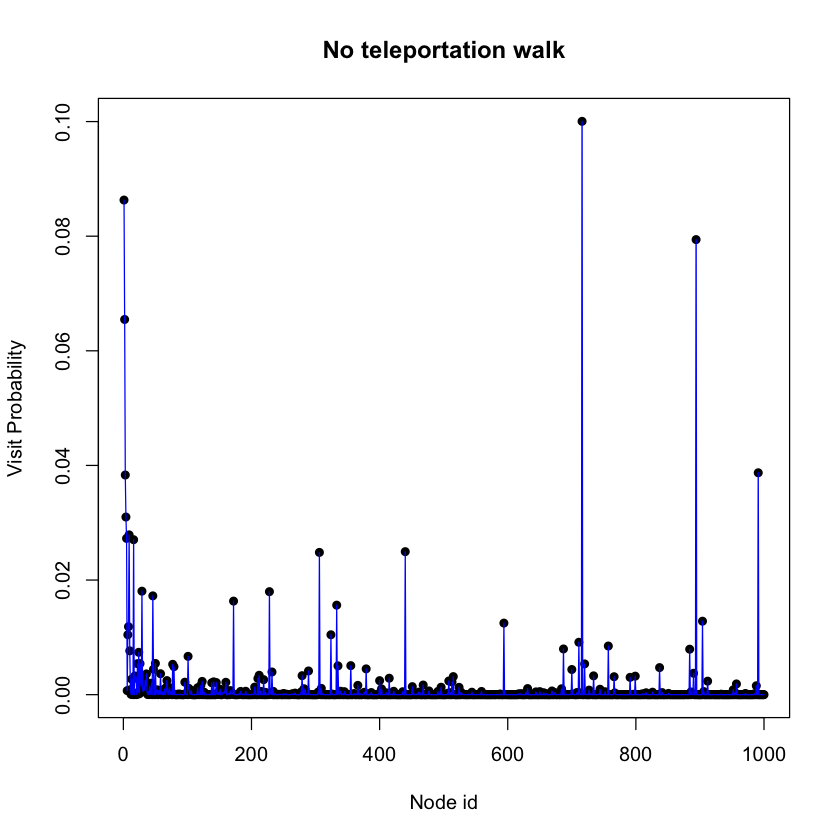

In [19]:
# Probability that walker visits each node.

iters = 100
freq = rep(0, 1000)
n_steps = vcount(g_final)
SSteps = ceiling(log(vcount(g_final)))

for(i in (1:iters)) {
    walk = random_walk(g_final, n_steps, sample(vcount(g_final), 1), NULL, 0.0, '')
    
    for (j in (1: n_steps)) {
        freq[walk[j]] = freq[walk[j]] + 1
    }
}

freq = freq / ((n_steps - SSteps) * iters)

plot((1:1000), freq, pch=16, xlab="Node id", ylab="Visit Probability", main="No teleportation walk")
lines(freq, col='blue')

print(paste("Pearson Correlation between Degree of nodes and visit prob:: ", cor(degree(g_final), freq)))

[1] "Intercept and slope:: "

Call:
lm(formula = freq ~ degree(g_final))

Coefficients:
    (Intercept)  degree(g_final)  
     -0.0018722        0.0001804  



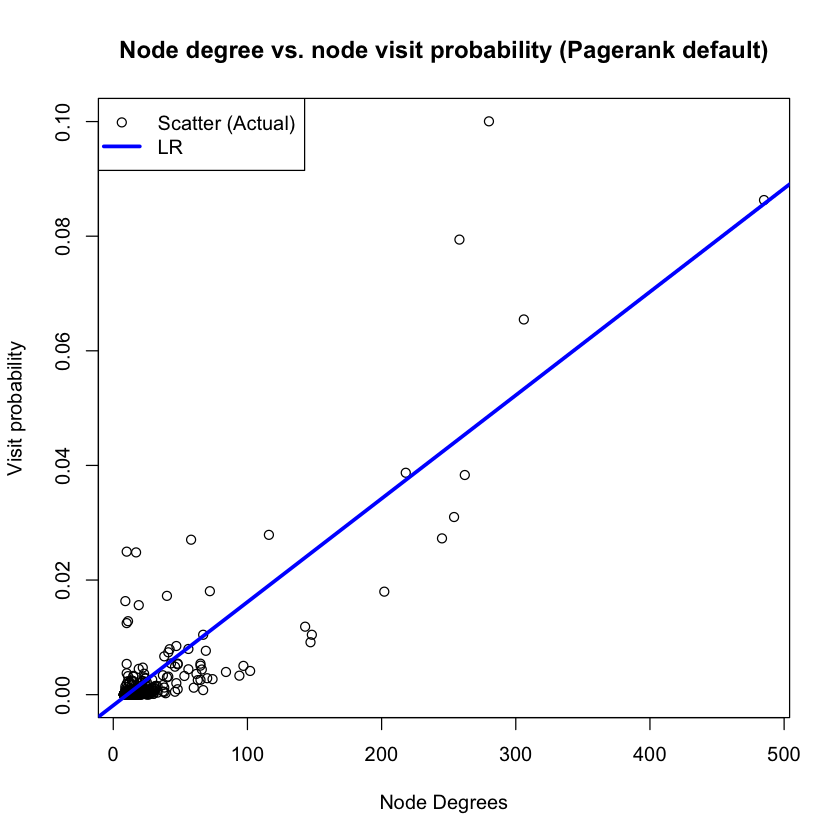

In [20]:
plot(degree(g_final), freq , xlab='Node Degrees', ylab='Visit probability',main="Node degree vs. node visit probability (Pagerank default)")

abline(lm(freq ~ degree(g_final)), col="blue",lwd=3,lty=1)
legend('topleft', legend = c("Scatter (Actual)", "LR"),
       lty = c(NA, 1), lwd = c(1,3), pch=c(1,NA),
       col = c('black','blue'))

print("Intercept and slope:: ")
print(lm(freq ~ degree(g_final)))


(b) In all previous questions, we didn’t have any teleportation. Now, we use a telepor- tation probability of α = 0.15. By performing random walks on the network created in 3(a), measure the probability that the walker visits each node. Is this probability related to the degree of the node?

[1] "Pearson Correlation between Degree of nodes and visit prob::  0.895818271492981"


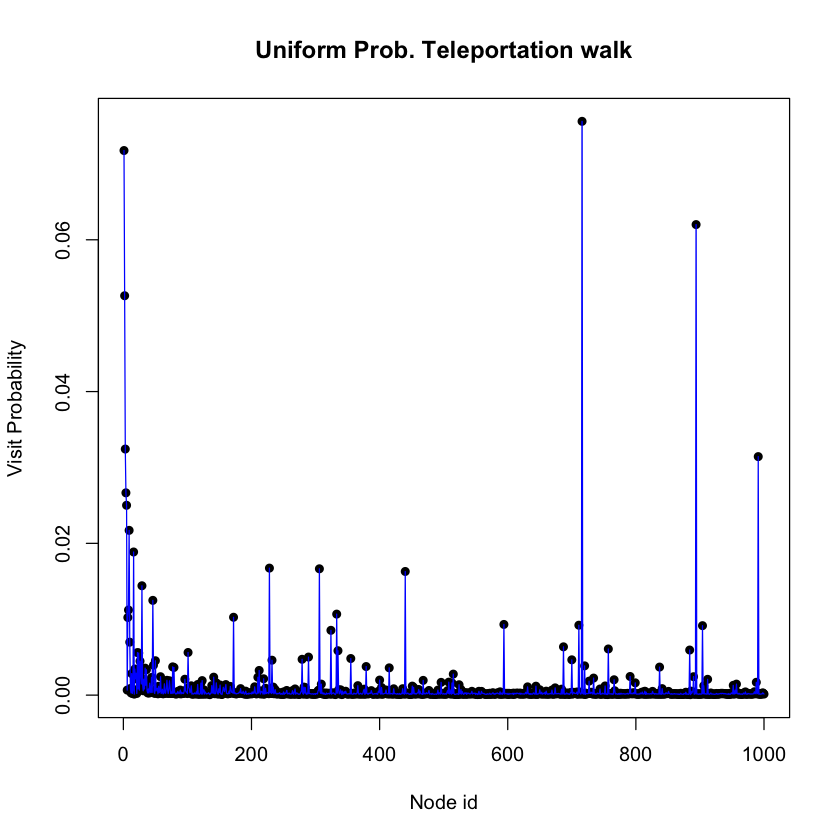

In [21]:
iters = 100
freq = rep(0, 1000)
n_steps = vcount(g_final)
SSteps = ceiling(log(vcount(g_final)))

for(i in (1:iters)) {
    walk = random_walk(g_final, n_steps, sample(vcount(g_final), 1), NULL, 0.15, 'uniform')
    
    for (j in (1: n_steps)) {
        freq[walk[j]] = freq[walk[j]] + 1
    }
}

freq = freq / ((n_steps - SSteps) * iters)

plot((1:1000), freq, pch=16, xlab="Node id", ylab="Visit Probability", main="Uniform Prob. Teleportation walk")
lines(freq, col='blue')

print(paste("Pearson Correlation between Degree of nodes and visit prob:: ", cor(degree(g_final), freq)))




[1] "Intercept and slope:: "

Call:
lm(formula = freq ~ degree(g_final))

Coefficients:
    (Intercept)  degree(g_final)  
     -0.0013564        0.0001481  



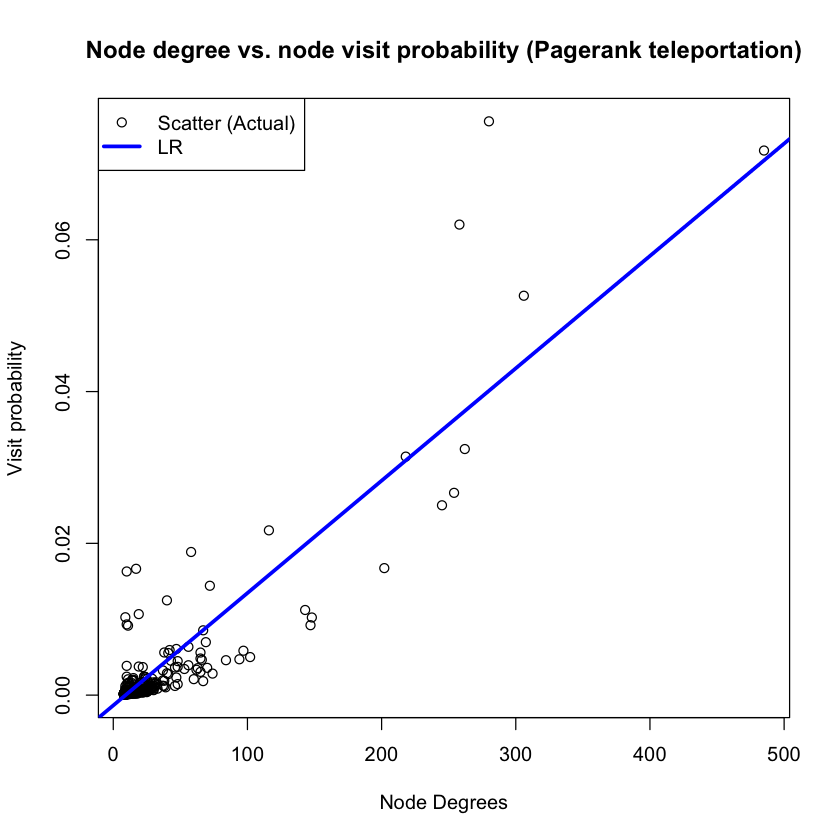

In [22]:
plot(degree(g_final), freq , xlab='Node Degrees', ylab='Visit probability',main="Node degree vs. node visit probability (Pagerank teleportation)")

abline(lm(freq ~ degree(g_final)), col="blue",lwd=3,lty=1)
legend('topleft', legend = c("Scatter (Actual)", "LR"),
       lty = c(NA, 1), lwd = c(1,3), pch=c(1,NA),
       col = c('black','blue'))

print("Intercept and slope:: ")
print(lm(freq ~ degree(g_final)))

Question 4:
While the use of PageRank has proven very effective, the web’s rapid growth in size and diversity drives an increasing demand for greater flexibility in ranking. Ideally, each user should be able to define their own notion of importance for each individual query.
(a) Suppose you have your own notion of importance. Your interest in a node is propor- tional to the node’s PageRank, because you totally rely upon Google to decide which website to visit (assume that these nodes represent websites). Again, use random walk on network generated in question 3 to simulate this personalized PageRank. Here the teleportation probability to each node is proportional to its PageRank (as opposed to the regular PageRank, where at teleportation, the chance of visiting all
nodes are the same and equal to N1 ). Again, let the teleportation probability be
equal to α = 0.15. Compare the results with 3(a).




[1] "Pearson Correlation between Degree of nodes and visit prob::  0.895794859178509"


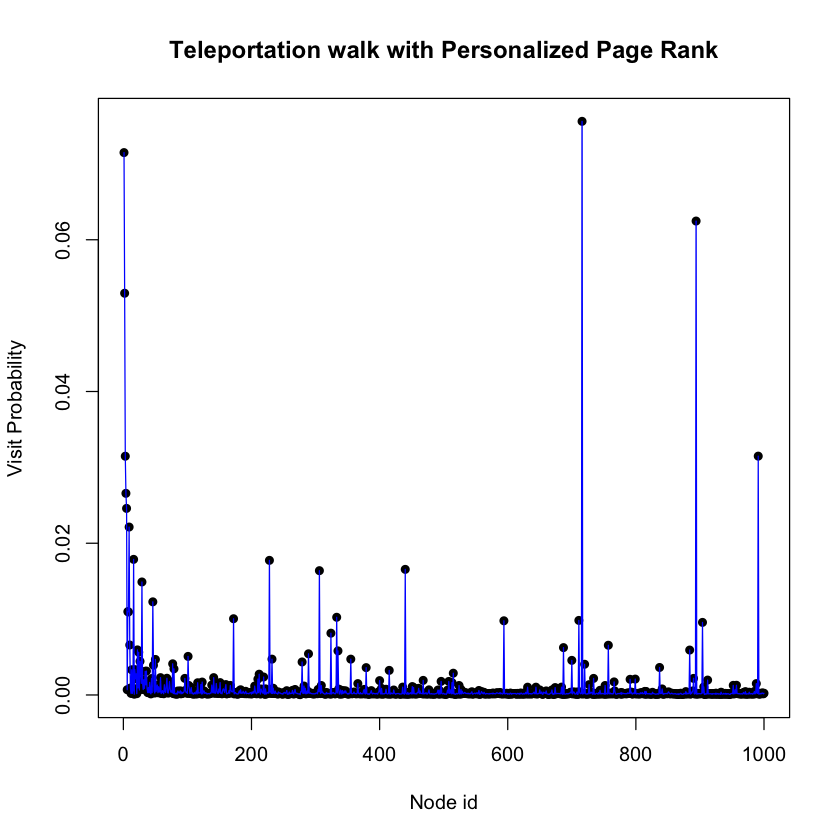

In [23]:
iters = 100
freq = rep(0, 1000)
n_steps = vcount(g_final)
SSteps = ceiling(log(vcount(g_final)))

for(i in (1:iters)) {
    walk = random_walk(g_final, n_steps, sample(vcount(g_final), 1), NULL, 0.15, 'page_rank')
    
    for (j in (1: n_steps)) {
        freq[walk[j]] = freq[walk[j]] + 1
    }
}

freq = freq / ((n_steps - SSteps) * iters)

plot((1:1000), freq, pch=16, xlab="Node id", ylab="Visit Probability", main="Teleportation walk with Personalized Page Rank")
lines(freq, col='blue')

print(paste("Pearson Correlation between Degree of nodes and visit prob:: ", cor(degree(g_final), freq)))

[1] "Intercept and slope:: "

Call:
lm(formula = freq ~ degree(g_final))

Coefficients:
    (Intercept)  degree(g_final)  
     -0.0013564        0.0001481  



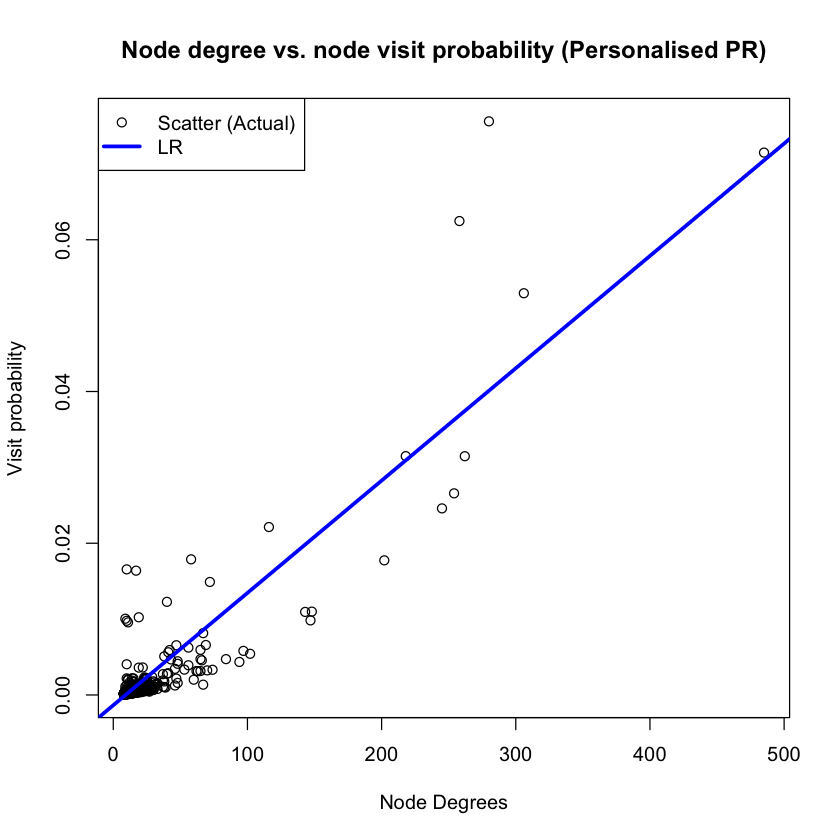

In [24]:
plot(degree(g_final), freq , xlab='Node Degrees', ylab='Visit probability',main="Node degree vs. node visit probability (Personalised PR)")

abline(lm(freq ~ degree(g_final)), col="blue",lwd=3,lty=1)
legend('topleft', legend = c("Scatter (Actual)", "LR"),
       lty = c(NA, 1), lwd = c(1,3), pch=c(1,NA),
       col = c('black','blue'))

print("Intercept and slope:: ")
print(lm(freq ~ degree(g_final)))

4b.

[1] "Pearson Correlation between Degree of nodes and visit prob::  0.727599931751967"


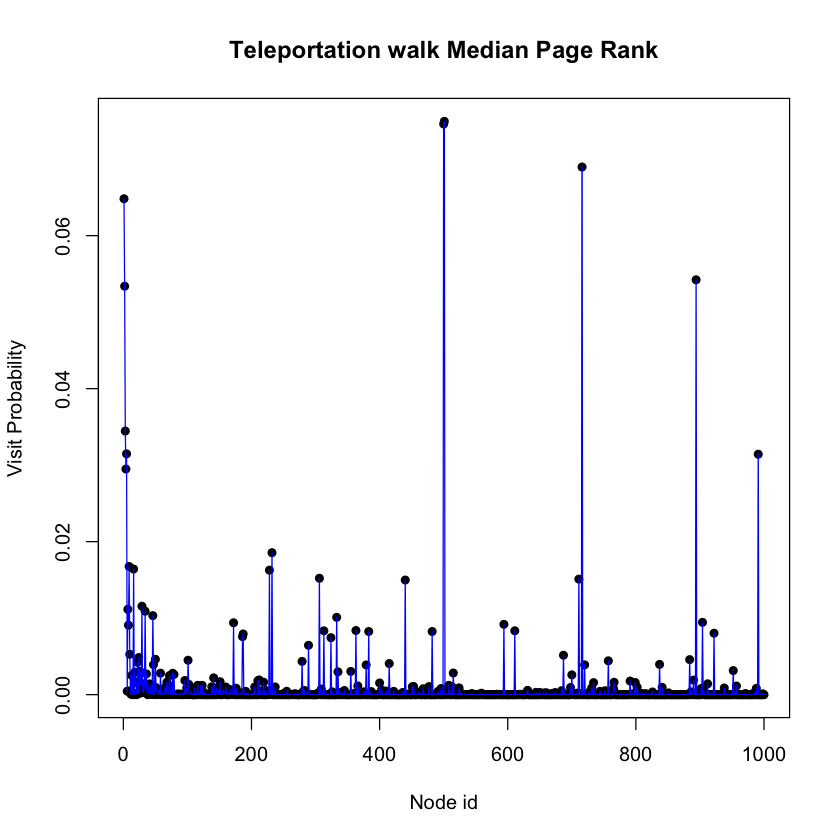

In [25]:
iters = 100
freq = rep(0, 1000)
n_steps = vcount(g_final)
SSteps = ceiling(log(vcount(g_final)))

for(i in (1:iters)) {
    walk = random_walk(g_final, n_steps, sample(vcount(g_final), 1), NULL, 0.15, 'median_page_rank')
    
    for (j in (1: n_steps)) {
        freq[walk[j]] = freq[walk[j]] + 1
    }
}

freq = freq / ((n_steps - SSteps) * iters)

plot((1:1000), freq, pch=16, xlab="Node id", ylab="Visit Probability", main="Teleportation walk Median Page Rank")
lines(freq, col='blue')

print(paste("Pearson Correlation between Degree of nodes and visit prob:: ", cor(degree(g_final), freq)))

[1] "Intercept and slope:: "

Call:
lm(formula = freq ~ degree(g_final))

Coefficients:
    (Intercept)  degree(g_final)  
     -0.0012631        0.0001422  



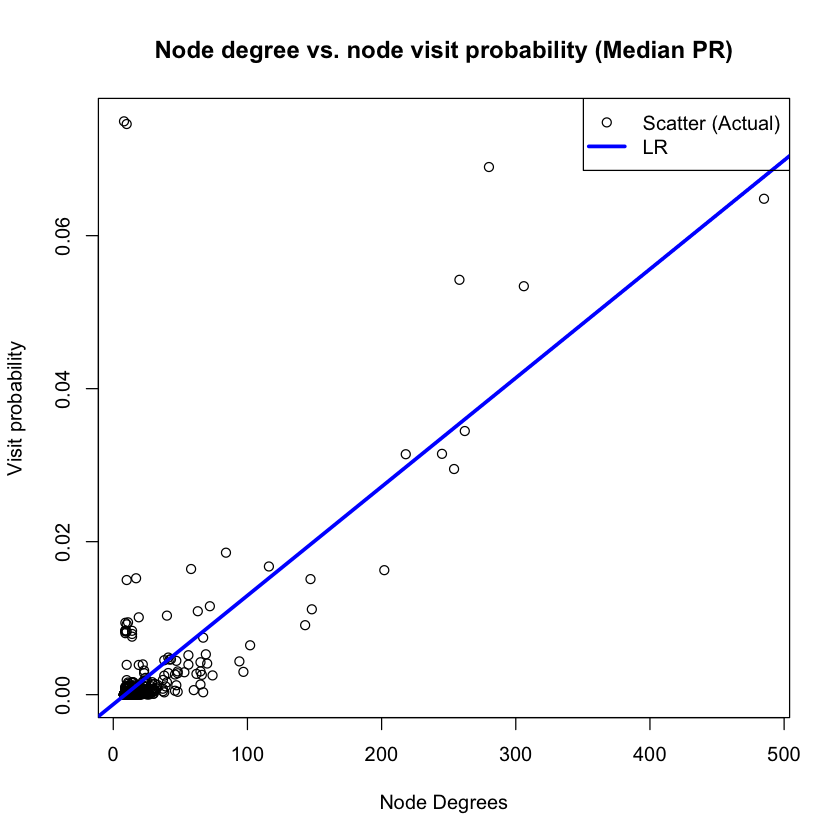

In [26]:
plot(degree(g_final), freq , xlab='Node Degrees', ylab='Visit probability',main="Node degree vs. node visit probability (Median PR)")

abline(lm(freq ~ degree(g_final)), col="blue",lwd=3,lty=1)
legend('topright', legend = c("Scatter (Actual)", "LR"),
       lty = c(NA, 1), lwd = c(1,3), pch=c(1,NA),
       col = c('black','blue'))

print("Intercept and slope:: ")
print(lm(freq ~ degree(g_final)))